In [12]:
import pandas as pd
import matplotlib.pyplot as plt

Strategy 1: Buy and hold

In [13]:
df = pd.read_csv("buy_and_hold.csv")
df['timestamp'] = df['Unnamed: 0']
df.index = df.timestamp
df = df.drop(['timestamp', 'Unnamed: 0'], axis=1)
df.index = pd.to_datetime(df.index).date
#df.algo_volatility.plot(figsize=(16, 8));
df


,period_open,period_close,transactions,returns,positions,gross_leverage,starting_exposure,net_leverage,ending_exposure,starting_value,...,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algo_volatility,benchmark_period_return,benchmark_volatility
2012-01-03,2012-01-03 14:31:00+00:00,2012-01-03 21:00:00+00:00,[],0.000000,[],0.000000,0.0,0.000000,0.0,0.0,...,NaN,0.000000,0.000000,0.0,0.0,1,2012-01,NaN,0.0,NaN
2012-01-04,2012-01-04 14:31:00+00:00,2012-01-04 21:00:00+00:00,"[{'amount': 100, 'dt': Timestamp('2012-01-04 2...",-0.001485,"[{'sid': Equity(2862 [TSLA]), 'amount': 100, '...",2.775122,0.0,2.775122,2771.0,0.0,...,-11.224972,-0.001485,2.775122,0.0,0.0,2,2012-01,0.016675,0.0,0.0
2012-01-05,2012-01-05 14:31:00+00:00,2012-01-05 21:00:00+00:00,[],-0.059088,"[{'sid': Equity(2862 [TSLA]), 'amount': 100, '...",2.886597,2771.0,2.886597,2712.0,2771.0,...,-9.392601,-0.060485,2.886597,0.0,0.0,3,2012-01,0.534871,0.0,0.0
2012-01-06,2012-01-06 14:31:00+00:00,2012-01-06 21:00:00+00:00,[],-0.022352,"[{'sid': Equity(2862 [TSLA]), 'amount': 100, '...",2.929731,2712.0,2.929731,2691.0,2712.0,...,-10.415916,-0.081485,2.929731,0.0,0.0,4,2012-01,0.437057,0.0,0.0
2012-01-09,2012-01-09 14:31:00+00:00,2012-01-09 21:00:00+00:00,[],0.037016,"[{'sid': Equity(2862 [TSLA]), 'amount': 100, '...",2.860849,2691.0,2.860849,2725.0,2691.0,...,-5.157665,-0.081485,2.929731,0.0,0.0,5,2012-01,0.557976,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,[],-0.020577,"[{'sid': Equity(2862 [TSLA]), 'amount': 100, '...",1.057646,33166.0,1.057646,32520.0,33166.0,...,1.823215,-0.587129,4.499378,0.0,0.0,1505,2017-12,0.786083,0.0,0.0
2017-12-26,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,[],-0.025726,"[{'sid': Equity(2862 [TSLA]), 'amount': 100, '...",1.059169,32520.0,1.059169,31729.0,32520.0,...,1.813217,-0.587129,4.499378,0.0,0.0,1506,2017-12,0.785912,0.0,0.0
2017-12-27,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,[],-0.018861,"[{'sid': Equity(2862 [TSLA]), 'amount': 100, '...",1.060306,31729.0,1.060306,31164.0,31729.0,...,1.805818,-0.587129,4.499378,0.0,0.0,1507,2017-12,0.785704,0.0,0.0
2017-12-28,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,[],0.012657,"[{'sid': Equity(2862 [TSLA]), 'amount': 100, '...",1.059552,31164.0,1.059552,31536.0,31164.0,...,1.809622,-0.587129,4.499378,0.0,0.0,1508,2017-12,0.785453,0.0,0.0


In [14]:
df.columns

Index(['period_open', 'period_close', 'transactions', 'returns', 'positions',
       'gross_leverage', 'starting_exposure', 'net_leverage',
       'ending_exposure', 'starting_value', 'ending_value', 'starting_cash',
       'ending_cash', 'portfolio_value', 'longs_count', 'shorts_count',
       'long_value', 'short_value', 'long_exposure', 'pnl', 'short_exposure',
       'capital_used', 'orders', 'TSLA', 'algorithm_period_return', 'alpha',
       'beta', 'sharpe', 'sortino', 'max_drawdown', 'max_leverage',
       'excess_return', 'treasury_period_return', 'trading_days',
       'period_label', 'algo_volatility', 'benchmark_period_return',
       'benchmark_volatility'],
      dtype='object')

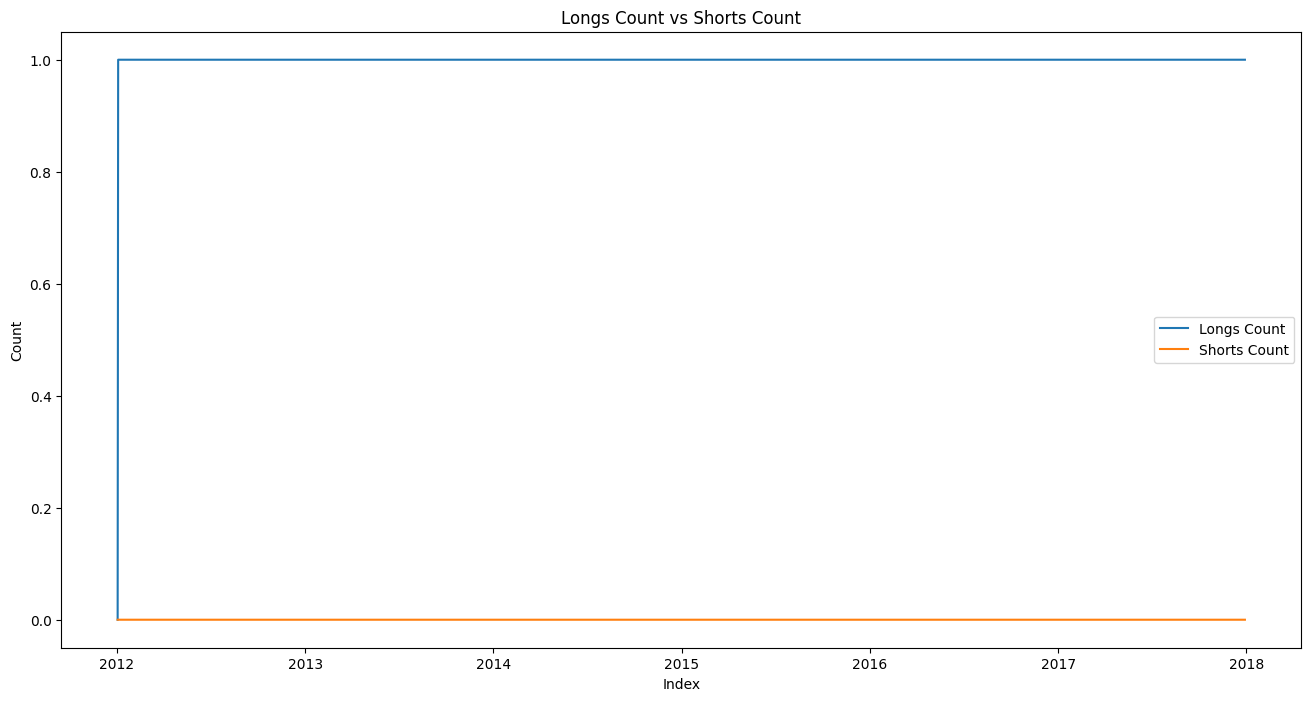

In [15]:

plt.figure(figsize=(16, 8))
plt.plot(df.index, df['longs_count'], label='Longs Count')
plt.plot(df.index, df['shorts_count'], label='Shorts Count')
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Longs Count vs Shorts Count')
plt.legend()
plt.show()


In [16]:
df.longs_count

2012-01-03    0
2012-01-04    1
2012-01-05    1
2012-01-06    1
2012-01-09    1
             ..
2017-12-22    1
2017-12-26    1
2017-12-27    1
2017-12-28    1
2017-12-29    1
Name: longs_count, Length: 1509, dtype: int64

In [17]:
#df.plot(y=['longs_count', 'shorts_count'], figsize=(16, 8));

#### Zipline Metrics ( <a href="https://github.com/quantopian/zipline/blob/94edd2baedd55b1c7391b16583cf1007ca898db6/zipline/finance/risk/period.py">URL</a> )

In [18]:
df.algorithm_period_return

2012-01-03     0.000000
2012-01-04    -0.001485
2012-01-05    -0.060485
2012-01-06    -0.081485
2012-01-09    -0.047485
                ...    
2017-12-22    29.747515
2017-12-26    28.956515
2017-12-27    28.391515
2017-12-28    28.763515
2017-12-29    28.362515
Name: algorithm_period_return, Length: 1509, dtype: float64

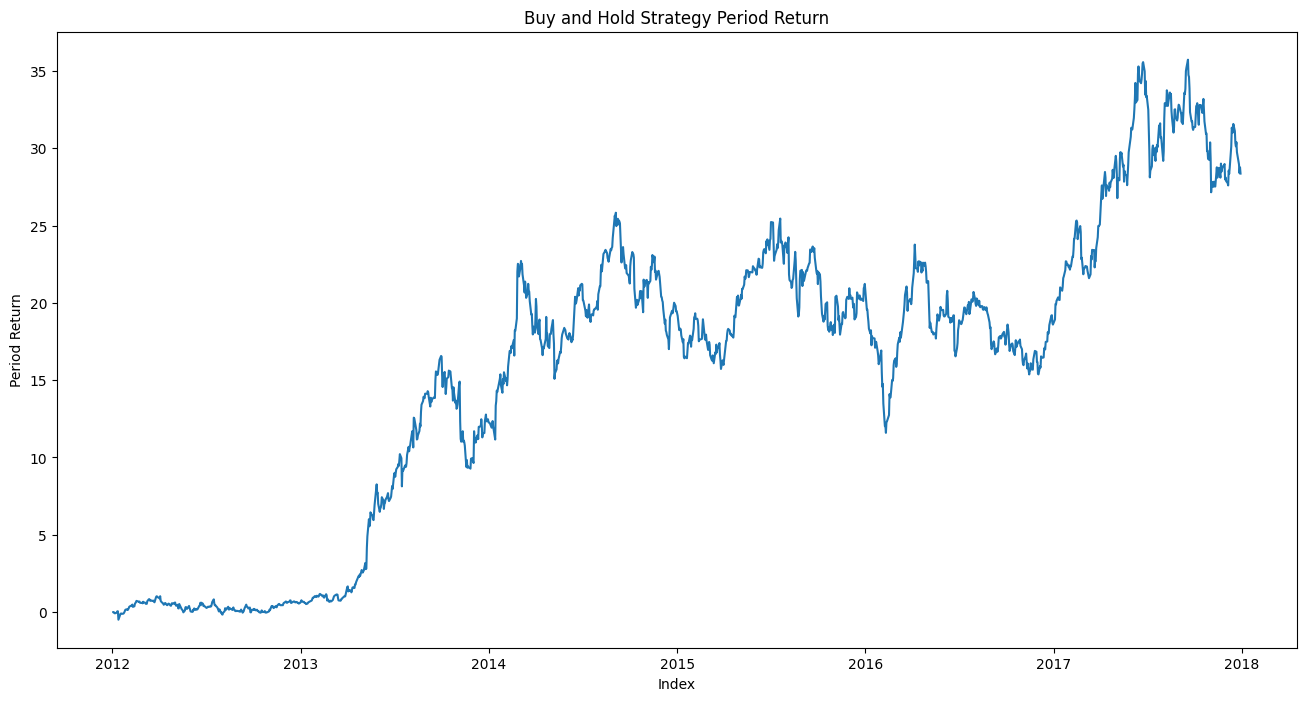

In [19]:

plt.figure(figsize=(16, 8))
plt.plot(df.index, df['algorithm_period_return'])
plt.xlabel('Index')
plt.ylabel('Period Return')
plt.title('Buy and Hold Strategy Period Return')
plt.show()


In [20]:
#xdf.algorithm_period_return.plot(figsize=(16, 8));

In [21]:
'${:,.2f}'.format(df.capital_used.sum())

'$-2,772.49'

In [22]:
'${:,.2f}'.format(df.portfolio_value.iloc[-1])

'$29,362.51'

In [23]:
'${:,.2f}'.format(df.portfolio_value.iloc[-1] + df.capital_used.sum())

'$26,590.03'

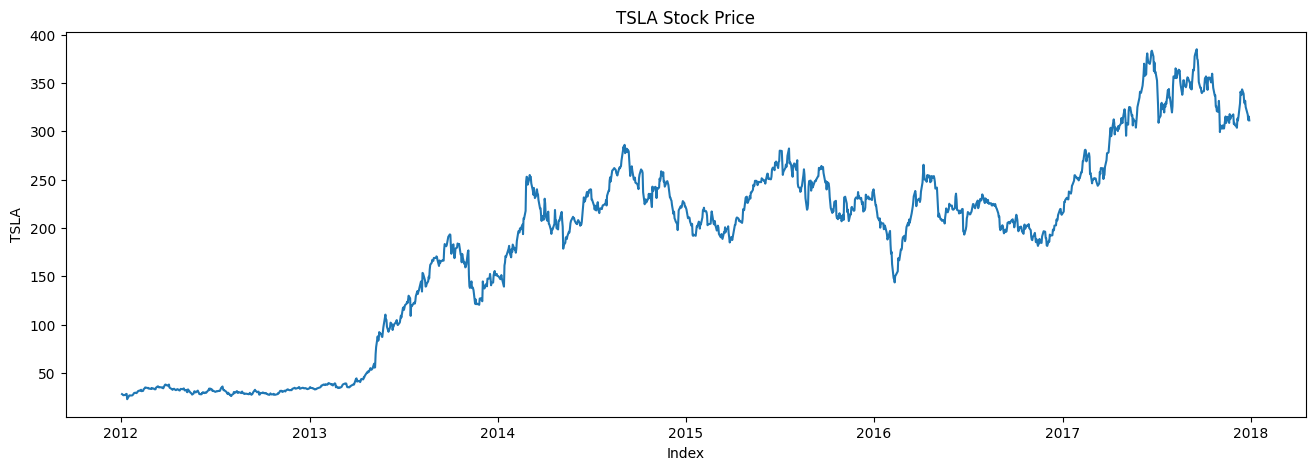

In [24]:
plt.figure(figsize=(16, 5))
plt.plot(df.index, df['TSLA'])
plt.xlabel('Index')
plt.ylabel('TSLA')
plt.title('TSLA Stock Price')
plt.show()


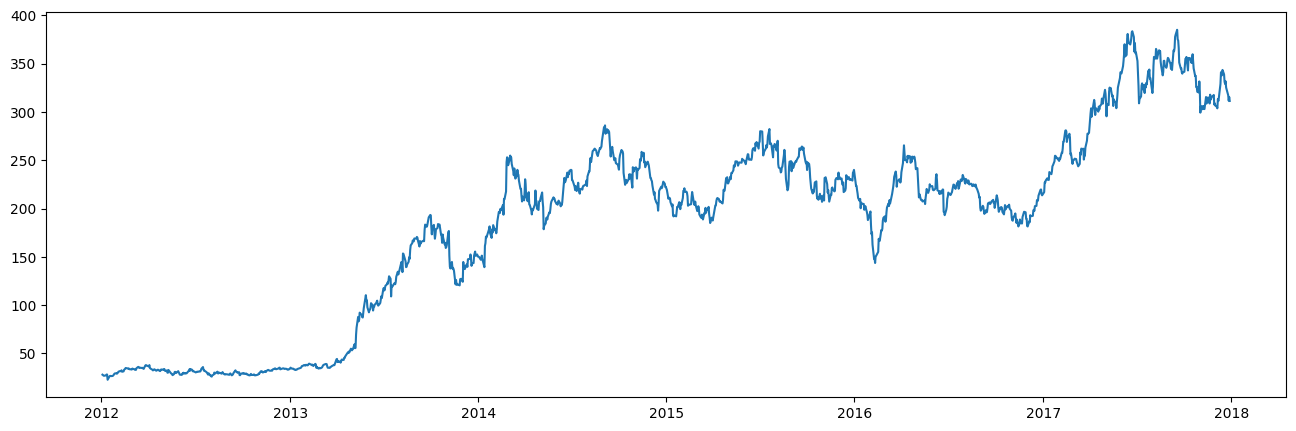

In [25]:
df.TSLA.plot(figsize=(16, 5));

In [26]:
df.TSLA

2012-01-03     28.08
2012-01-04     27.71
2012-01-05     27.12
2012-01-06     26.91
2012-01-09     27.25
               ...  
2017-12-22    325.20
2017-12-26    317.29
2017-12-27    311.64
2017-12-28    315.36
2017-12-29    311.35
Name: TSLA, Length: 1509, dtype: float64

#### Split-Adjusted Data ( <a href="https://finance.yahoo.com/quote/AAPL/chart?p=AAPL#eyJpbnRlcnZhbCI6Im1vbnRoIiwicGVyaW9kaWNpdHkiOjEsInRpbWVVbml0IjpudWxsLCJjYW5kbGVXaWR0aCI6Ni43NDgwOTE2MDMwNTM0MzUsInZvbHVtZVVuZGVybGF5Ijp0cnVlLCJhZGoiOnRydWUsImNyb3NzaGFpciI6dHJ1ZSwiY2hhcnRUeXBlIjoibGluZSIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiQUFQTCIsImNoYXJ0TmFtZSI6ImNoYXJ0IiwidG9wIjowfX0sImxpbmVXaWR0aCI6Miwic3RyaXBlZEJhY2tncm91ZCI6dHJ1ZSwiZXZlbnRzIjp0cnVlLCJjb2xvciI6IiMwMDgxZjIiLCJldmVudE1hcCI6eyJjb3Jwb3JhdGUiOnsiZGl2cyI6dHJ1ZSwic3BsaXRzIjp0cnVlfSwic2lnRGV2Ijp7fX0sInN5bWJvbHMiOlt7InN5bWJvbCI6IkFBUEwiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiQUFQTCJ9LCJwZXJpb2RpY2l0eSI6MSwiaW50ZXJ2YWwiOiJtb250aCIsInRpbWVVbml0IjpudWxsfV0sInJhbmdlIjp7ImR0TGVmdCI6IjIwMDctMTItMzFUMjI6MDA6MDAuMDAwWiIsImR0UmlnaHQiOiIyMDE4LTExLTA1VDA5OjMzOjM5Ljk3MloiLCJwZXJpb2RpY2l0eSI6eyJpbnRlcnZhbCI6Im1vbnRoIiwicGVyaW9kIjoxfSwicGFkZGluZyI6MH0sInN0dWRpZXMiOnsidm9sIHVuZHIiOnsidHlwZSI6InZvbCB1bmRyIiwiaW5wdXRzIjp7ImlkIjoidm9sIHVuZHIiLCJkaXNwbGF5Ijoidm9sIHVuZHIifSwib3V0cHV0cyI6eyJVcCBWb2x1bWUiOiIjMDBiMDYxIiwiRG93biBWb2x1bWUiOiIjRkYzMzNBIn0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7IndpZHRoRmFjdG9yIjowLjQ1LCJjaGFydE5hbWUiOiJjaGFydCJ9fX0sImN1c3RvbVJhbmdlIjp7InN0YXJ0IjoxMTk5MjI0ODAwMDAwLCJlbmQiOjE1MzgzNDQ4MDAwMDB9fQ%3D%3D">URL</a> )

Strategy 2: Autocorrelation

In [ ]:
df2 = pd.read_csv("auto_correlation.csv")
df2['timestamp'] = df2['Unnamed: 0']
df2.index = df2.timestamp
df2 = df2.drop(['timestamp', 'Unnamed: 0'], axis=1)
df2.index = pd.to_datetime(df2.index).date
#df2.algo_volatility.plot(figsize=(16, 8));
df2

,period_open,period_close,shorts_count,long_value,short_value,long_exposure,pnl,capital_used,short_exposure,orders,...,alpha,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label
2012-01-03,2012-01-03 14:31:00+00:00,2012-01-03 21:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,[],...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,1,2012-01
2012-01-04,2012-01-04 14:31:00+00:00,2012-01-04 21:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,[],...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,2,2012-01
2012-01-05,2012-01-05 14:31:00+00:00,2012-01-05 21:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,[],...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,3,2012-01
2012-01-06,2012-01-06 14:31:00+00:00,2012-01-06 21:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,[],...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,4,2012-01
2012-01-09,2012-01-09 14:31:00+00:00,2012-01-09 21:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,[],...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,5,2012-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,[],...,NaN,NaN,0.827050,1.414065,-0.540365,6.148855,0.0,0.0,1505,2017-12
2017-12-26,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,[],...,NaN,NaN,0.826775,1.413595,-0.540365,6.148855,0.0,0.0,1506,2017-12
2017-12-27,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,[],...,NaN,NaN,0.826500,1.413126,-0.540365,6.148855,0.0,0.0,1507,2017-12
2017-12-28,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,[],...,NaN,NaN,0.826226,1.412658,-0.540365,6.148855,0.0,0.0,1508,2017-12


In [ ]:
df2.columns

Index(['period_open', 'period_close', 'shorts_count', 'long_value',
       'short_value', 'long_exposure', 'pnl', 'capital_used', 'short_exposure',
       'orders', 'transactions', 'returns', 'positions', 'gross_leverage',
       'starting_exposure', 'net_leverage', 'ending_exposure',
       'starting_value', 'ending_value', 'starting_cash', 'ending_cash',
       'portfolio_value', 'longs_count', 'ASSETME', 'CORR', 'algo_volatility',
       'benchmark_period_return', 'benchmark_volatility',
       'algorithm_period_return', 'alpha', 'beta', 'sharpe', 'sortino',
       'max_drawdown', 'max_leverage', 'excess_return',
       'treasury_period_return', 'trading_days', 'period_label'],
      dtype='object')

<Axes: >

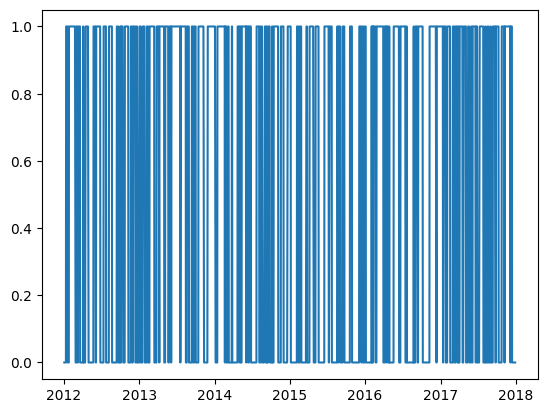

In [ ]:
df2.longs_count.plot()

In [ ]:
df2.longs_count.sum()

821

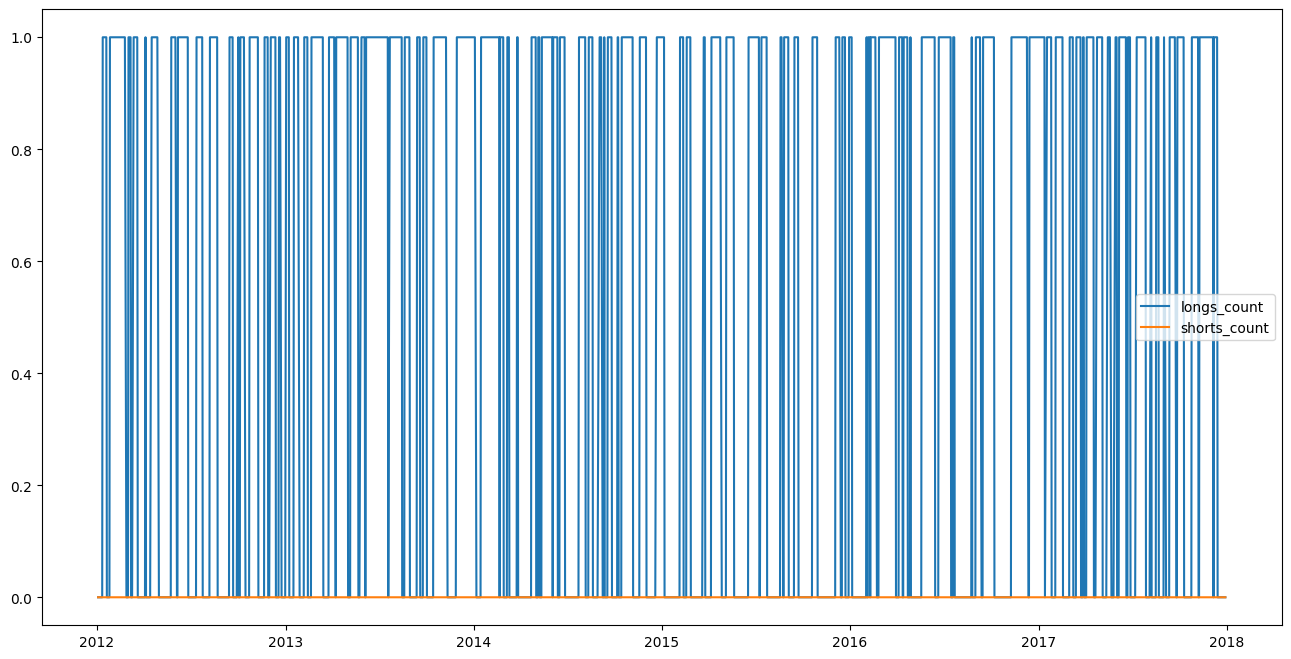

In [ ]:
df2.plot(y=['longs_count', 'shorts_count'], figsize=(16, 8));

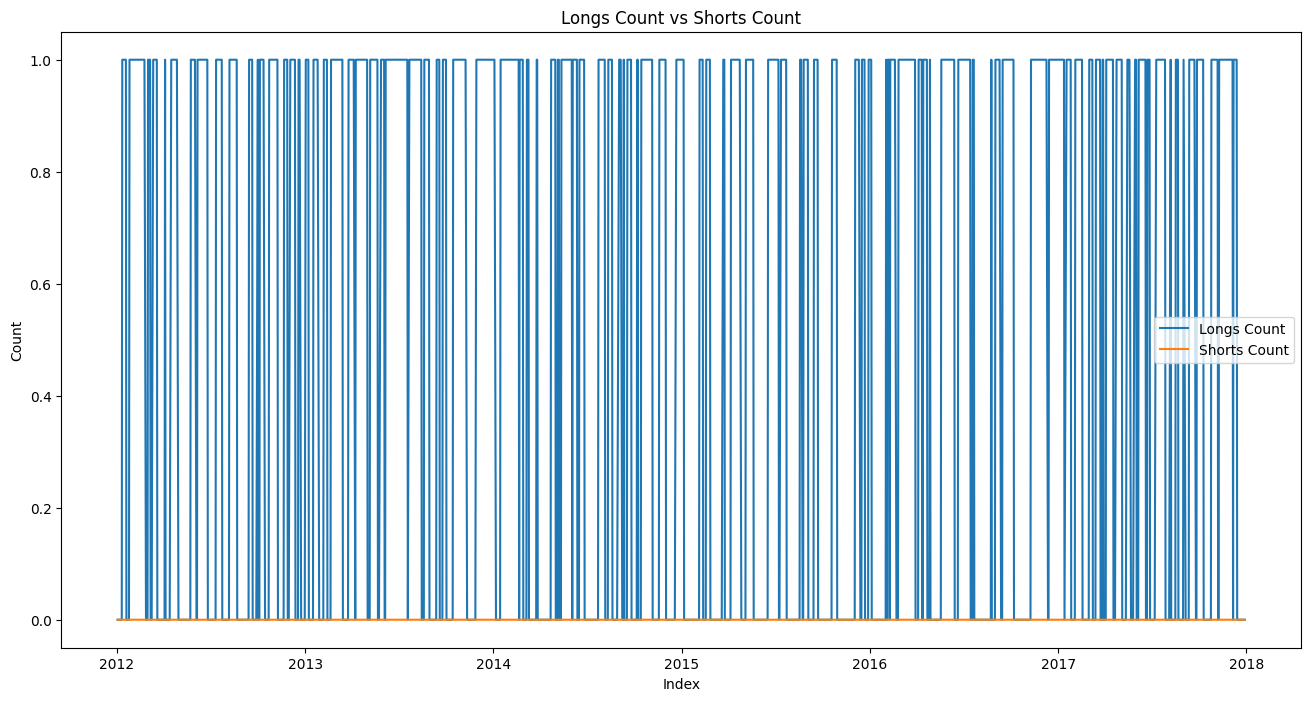

In [ ]:

plt.figure(figsize=(16, 8))
plt.plot(df2.index, df2['longs_count'], label='Longs Count')
plt.plot(df2.index, df2['shorts_count'], label='Shorts Count')
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Longs Count vs Shorts Count')
plt.legend()
plt.show()


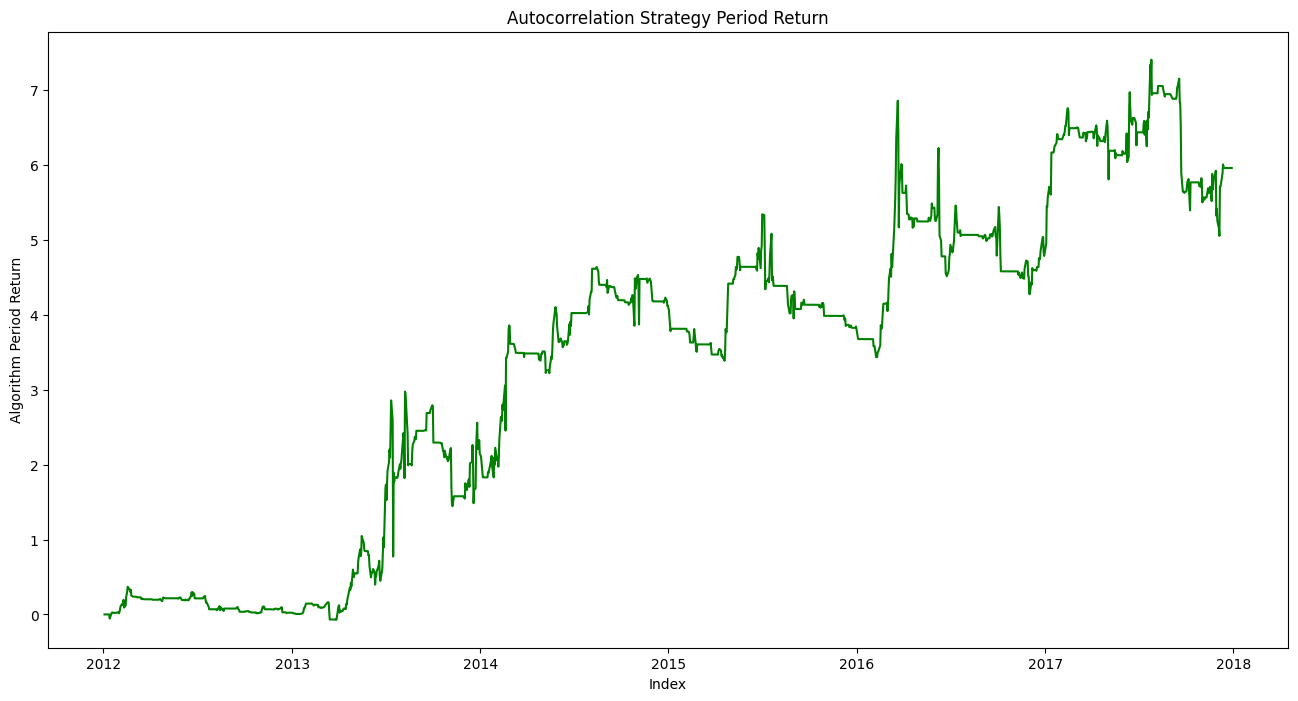

In [29]:

plt.figure(figsize=(16, 8))
plt.plot(df2.index, df2['algorithm_period_return'], color='green')
plt.xlabel('Index')
plt.ylabel('Algorithm Period Return')
plt.title('Autocorrelation Strategy Period Return')
plt.show()


<Axes: >

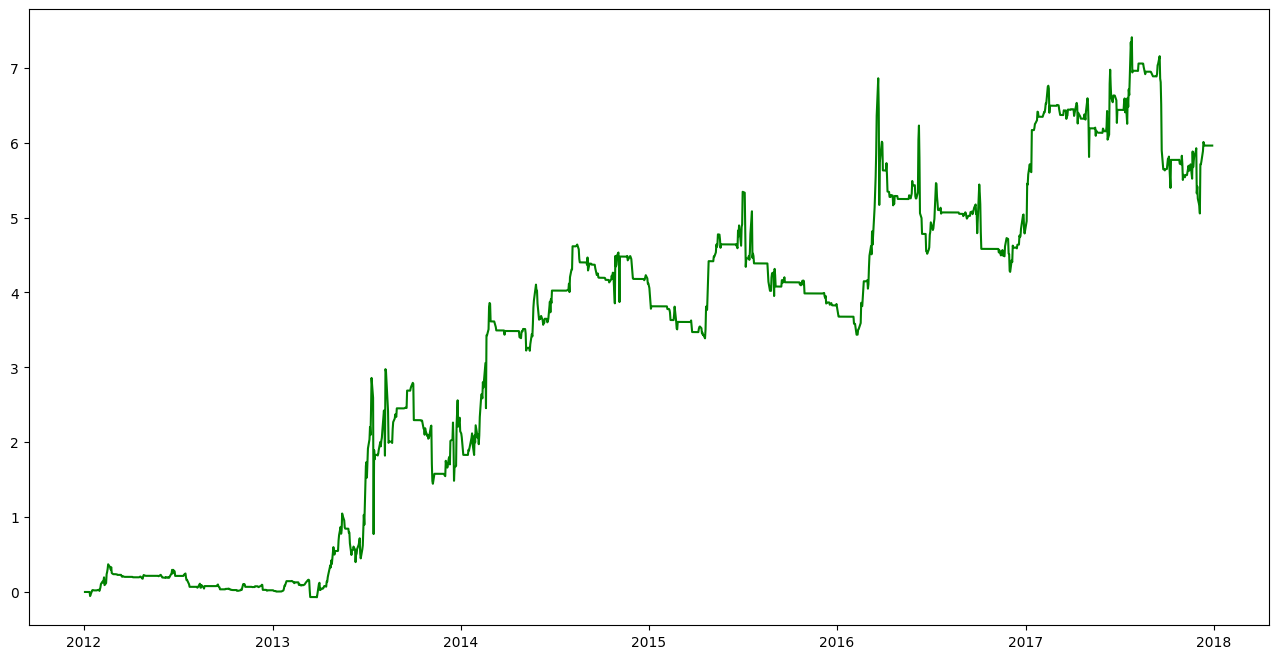

In [ ]:
df2.algorithm_period_return.plot(figsize=(16, 8), color='green')

<Axes: >

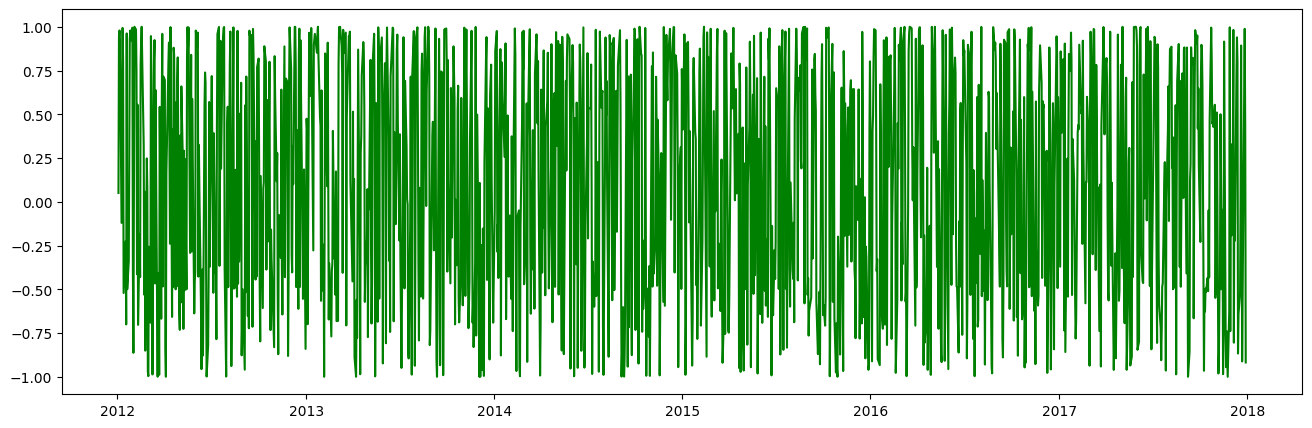

In [117]:
df2.CORR.plot(figsize=(16, 5), color="green")
#df2.columns

In [30]:
'${:,.2f}'.format(df2.capital_used.sum())

'$5,961.63'

In [122]:
'${:,.2f}'.format(df2.portfolio_value.iloc[-1])

'$6,961.63'

In [120]:
'${:,.2f}'.format(df2.portfolio_value.iloc[-1] + df2.capital_used.sum())

'$12,923.25'

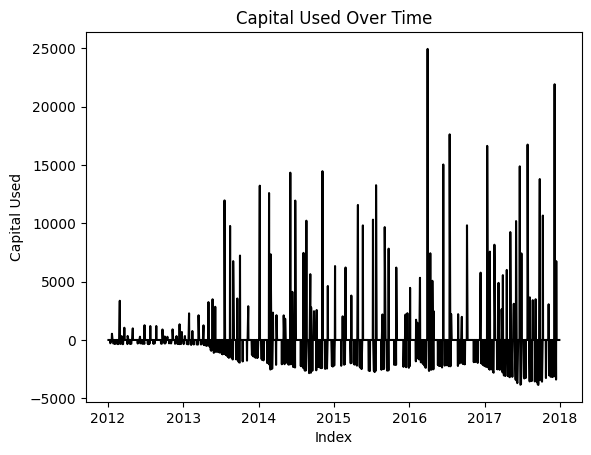

In [31]:
plt.plot(df2.index, df2['capital_used'], color='black')
plt.xlabel('Index')
plt.ylabel('Capital Used')
plt.title('Capital Used Over Time')
plt.show()